APPLIED STATISTICS ASSIGNMENT - BY AADISH AGRAWAL
Extraordinary analysis! the way you have started the analysis and Exploratory data analysis and its detailed insights are really good. You have given clear cut insights step by step and in a structured way, The way you have continued your analysis is highly appreciable. Good Job done. Happy learning.

1. Import the necessary libraries

In [30]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

sns.set(color_codes=True)

2. Read the data as a data frame

In [31]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Exploratory Data Analysis
a. Shape of the data- It has 1338 rows and 7 columns

In [32]:
df.shape

(1338, 7)

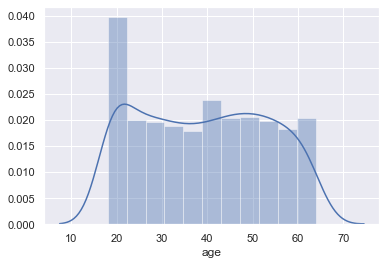

In [33]:
sns.distplot(df['age'])

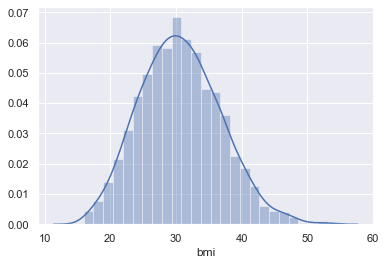

In [34]:
sns.distplot(df['bmi'])

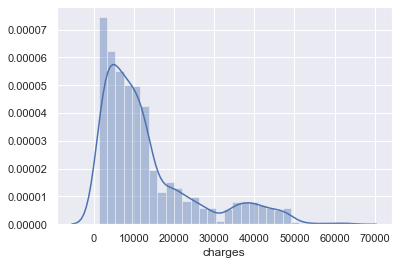

In [35]:
sns.distplot(df['charges'])

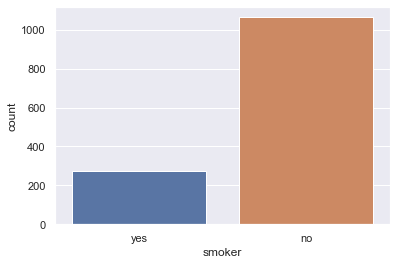

In [36]:
sns.countplot(df['smoker'])

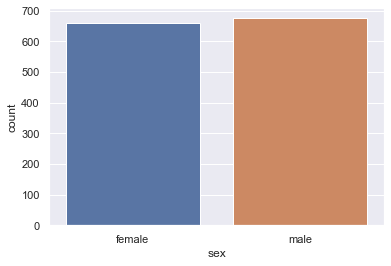

In [37]:
sns.countplot(df['sex'])

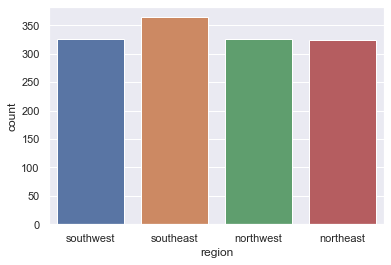

In [38]:
sns.countplot(df['region'])

b. Data type of each attribute
Following columns(attribute) data type
age           int64(integer)
sex          object(categorical)
bmi         float64(float)
children      int64(integer) 
smoker       object(categorical)
region       object(categorical)
charges     float64(float)

In [39]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

c. Checking the presence of missing values

age           0 missing value
sex           0 missing value
bmi           0 missing value
children      0 missing value
smoker        0 missing value
region        0 missing value
charges       0 missing value

df.describe() -  It shows that all four continous column doesnot has any missing value

df[df.isnull() == True].count() - Confirming null value absence 

df.dtypes - It also confirm all column has correct datatype


In [40]:
df[df.isna() == True].iloc[:,0].count()

0

In [41]:
df[df.isna() == True].iloc[:,1].count()

0

In [42]:
df[df.isna() == True].iloc[:,2].count()

0

In [43]:
df[df.isna() == True].iloc[:,3].count()

0

In [44]:
df[df.isna() == True].iloc[:,4].count()

0

In [45]:
df[df.isna() == True].iloc[:,5].count()

0

In [46]:
df[df.isna() == True].iloc[:,6].count()

0

In [47]:
df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [48]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
df[df.isnull() == True].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

d. 5 point summary of numerical attributes
Attribute  Min     Q1      Median    Q3    Max

age        18      27       39       51     64  

bmi        15.96   26.29    30.40.   34.69   53.13     

Children   0        0        1       2       5

Charges 1121.87  4740.28  9382.03   16639.91  63770.42  


In [50]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [51]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [52]:
df['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [53]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

bmi - It shapes similar to normal distribution with mean around 30 

age - It seems like uniform distribution for every age class except for age class 20 which has higher frequency           than others

charges - It follows negative exponential distribution where frequency decreasing exponentially with increasing               charges

We can conclude mostly Individual medical costs billed by health insurance is below 20000 across all class of ages

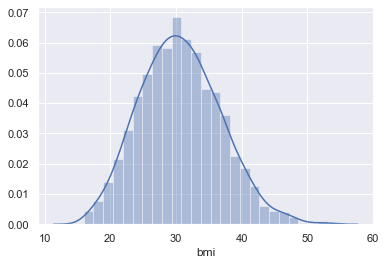

In [54]:
sns.distplot(df['bmi'])

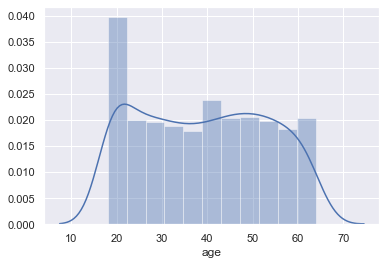

In [55]:
sns.distplot(df['age'])

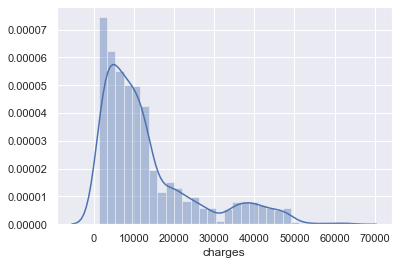

In [56]:
sns.distplot(df['charges'])

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

Formula - 3(mean - median)/Standarad_deviation

All three attributes skewness are greater than 0 which imply for all three distribution mean is more than median. Thus we can say it is right skewed and outliers will be present in the right tail.

In [57]:
df.skew(axis = 0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [58]:
stats.skew(df['age'], axis=0, bias=True)

0.055610083072599126

In [59]:
stats.skew(df['bmi'], axis=0, bias=True)

0.28372857291709386

In [60]:
stats.skew(df['charges'], axis=0, bias=True)

1.5141797118745743

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

charges - It has numerous outliers 
bmi     - It has few outliers
age     - No Outliers

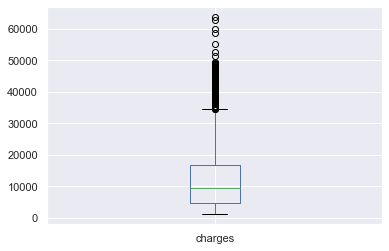

In [61]:
df.boxplot(column='charges')

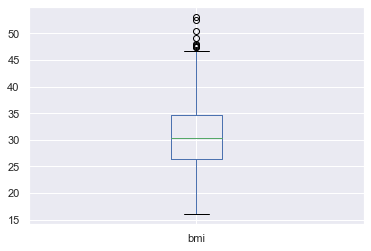

In [62]:
df.boxplot(column='bmi')

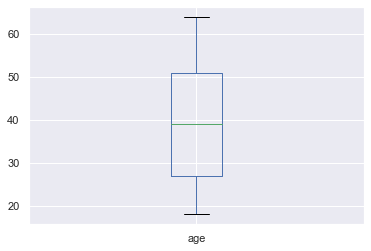

In [63]:
df.boxplot(column='age')

h. Distribution of categorical columns (include children)

Smoker - Number of non-smoker is substantially greater than number of smoker

Sex - Male and female are almost similar in number

Region - People belong to southeast are greater than other regions

Children - Dataset mostly comprises of those people who has less than or equal to 3 children

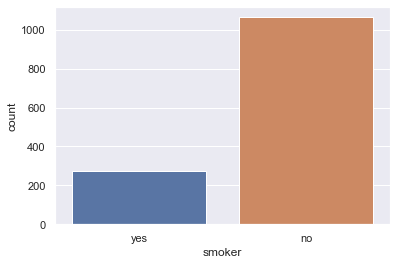

In [64]:
sns.countplot(df['smoker'])

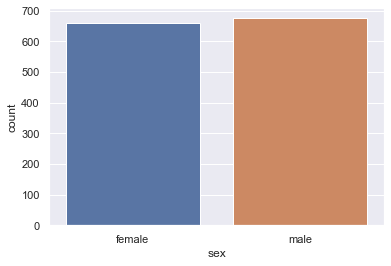

In [65]:
sns.countplot(df['sex'])

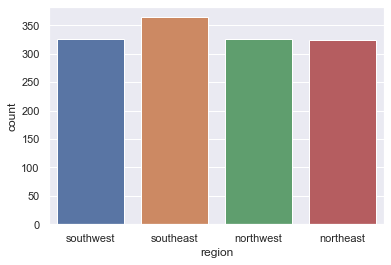

In [66]:
sns.countplot(df['region'])

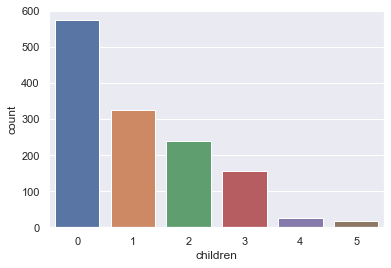

In [67]:
sns.countplot(df['children'])

i. Pairplot that includes all the columns of the dataframe

Since pairplot symmetric about diagonal lets consider plots at and lower to main diagonal:

1. Diagonal plots show distribution of continous variable where age has uniform distribution across the range, bmi has normal distribution, charges follows negative exponential distribution
2. bmi vs age - doesn't show any relevant relation
3. charges vs age - show positive linear relation
4. charge vs bmi - doesn't show any relevant relation
5. hue = smoker - In charges vs age smoker has high charges compare to non-smoker irrespective of any age

In [79]:
df_new1 = df.copy()
df_new1['children'] =  df_new1['children'].replace({0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five'})
df_new1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,zero,yes,southwest,16884.92400
1,18,male,33.770,one,no,southeast,1725.55230
2,28,male,33.000,three,no,southeast,4449.46200
3,33,male,22.705,zero,no,northwest,21984.47061
4,32,male,28.880,zero,no,northwest,3866.85520


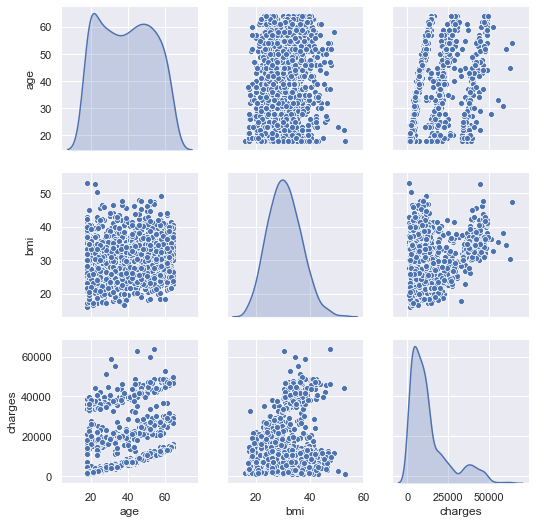

In [80]:
sns.pairplot(df_new1,diag_kind='kde')

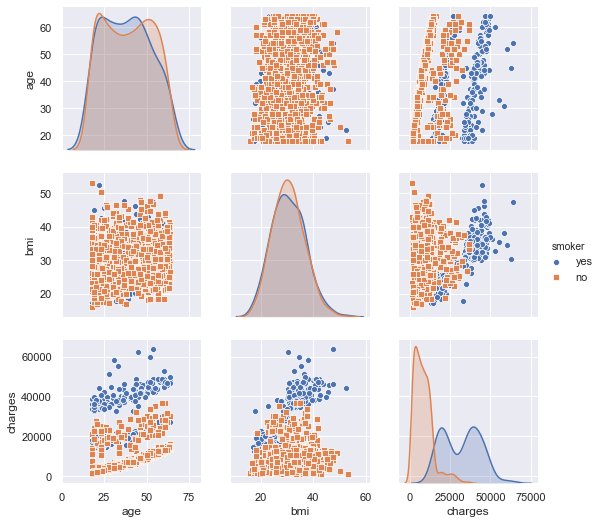

In [81]:
sns.pairplot(df_new1,hue="smoker", markers=["o", "s"])

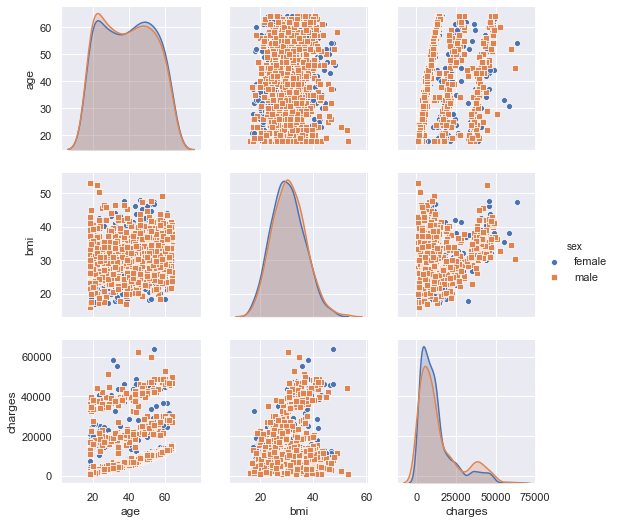

In [82]:
sns.pairplot(df_new1,hue="sex", markers=["o", "s"])

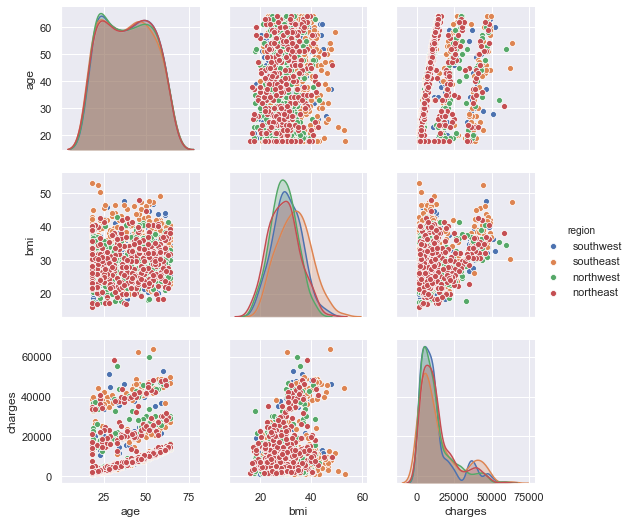

In [83]:
sns.pairplot(df_new1,hue="region")

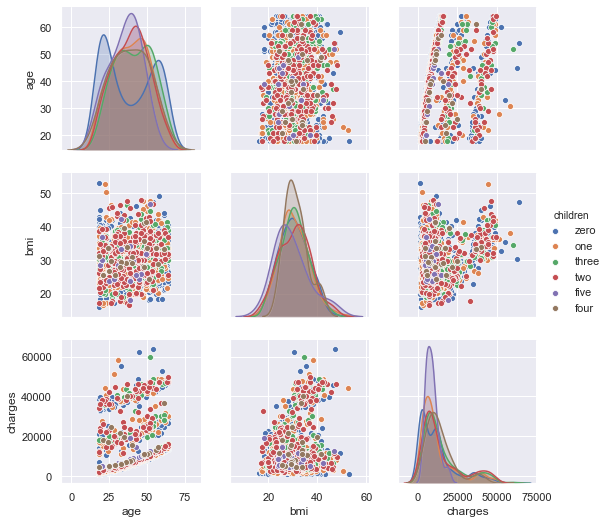

In [84]:
sns.pairplot(df_new1,hue="children")

4. Answer the following questions with statistical evidence
a. Do charges of people who smoke differ significantly from the people who don't?
After comparing 5 point summary and box plot of smoker and non-smoker we can say charges of smoker differ significantly compared with non smoker

          SMOKER              NON-SMOKER       Difference
mean     32050.231832        8434.268298       23615.963534
std      11541.547176        5993.781819       5547.765356
min      12829.455100        1121.873900       11707.581200
25%      20826.244213        3986.438700       16839.805513
50%      34456.348450        7345.405300       27110.943150
75%      41019.207275        11362.887050      29656.320225
max      63770.428010        36910.608030      26859.819980

In [40]:
df1 = df.groupby('smoker')
df1['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [41]:
df[df['smoker']=='yes']['charges'].describe() - df[df['smoker']=='no']['charges'].describe()

count     -790.000000
mean     23615.963534
std       5547.765356
min      11707.581200
25%      16839.805513
50%      27110.943150
75%      29656.320225
max      26859.819980
Name: charges, dtype: float64

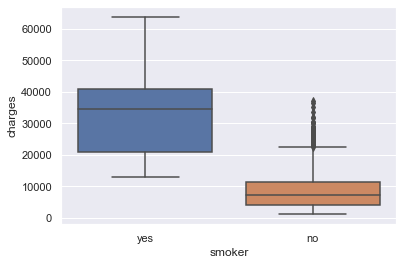

In [42]:
sns.boxplot(df['smoker'],df['charges'])

Hypothesis Method- a. Do charges of people who smoke differ significantly from the people who don't?

Step1. Null Hypothesis - Both Smoker/Non-Smoker charges are same.
       Alternate Hypothesis - Both category charges differ significantly
       
Step2. Alpha =  0.01. -> 1% of significance 
Step3.  two sample t-test
Step4.  difference between group1(smoker) and group2(non-smoker) mean is 46.6 SD and pvalue is significantly lesser than 0.01 ,thus we reject null hypothesis 

ANSWER - This statistical evidence confirm that charges of people who smoke differ significantly from the people who don't

In [43]:
group1 = df[df['smoker']=='yes']['charges']
group1.to_numpy(copy= True)

array([16884.924  , 27808.7251 , 39611.7577 , 36837.467  , 37701.8768 ,
       38711.     , 35585.576  , 51194.55914, 39774.2763 , 48173.361  ,
       38709.176  , 23568.272  , 37742.5757 , 47496.49445, 34303.1672 ,
       23244.7902 , 14711.7438 , 17663.1442 , 16577.7795 , 37165.1638 ,
       39836.519  , 21098.55405, 43578.9394 , 30184.9367 , 47291.055  ,
       22412.6485 , 15820.699  , 30942.1918 , 17560.37975, 47055.5321 ,
       19107.7796 , 39556.4945 , 17081.08   , 32734.1863 , 18972.495  ,
       20745.9891 , 40720.55105, 19964.7463 , 21223.6758 , 15518.18025,
       36950.2567 , 21348.706  , 36149.4835 , 48824.45   , 43753.33705,
       37133.8982 , 20984.0936 , 34779.615  , 19515.5416 , 19444.2658 ,
       17352.6803 , 38511.6283 , 29523.1656 , 12829.4551 , 47305.305  ,
       44260.7499 , 41097.16175, 43921.1837 , 33750.2918 , 17085.2676 ,
       24869.8368 , 36219.40545, 46151.1245 , 17179.522  , 42856.838  ,
       22331.5668 , 48549.17835, 47896.79135, 42112.2356 , 16297

In [44]:
group2 = df[df['smoker']=='no']['charges']
group2.to_numpy(copy= True)

array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
        1629.8335 ,  2007.945  ])

In [45]:
t_statistic , p_value = ttest_ind(group1,group2)
print(t_statistic , p_value)

46.664921172723716 8.271435842177219e-283


b. Does bmi of males differ significantly from that of females?
After comparing 5 point summary and box plot of bmi of male and bmi of female we can say that bmi doesn't differ significantly between bmi of male and female.

        count	mean	      std	      min	 25%	 50%	  75%	     max
sex								

male	676.0	30.943129	6.140435	15.960	26.410	30.6875	34.99250	53.13
female	662.0	30.377749	6.046023	16.815	26.125	30.1075	34.31375	48.07
diff	14.0	0.565379	0.094412	-0.855	0.285	0.580	0.678750	5.06



In [46]:
df2 = df.groupby('sex')
df2['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


In [47]:
df[df['sex']=='male']['bmi'].describe() - df[df['sex']=='female']['bmi'].describe()

count    14.000000
mean      0.565379
std       0.094412
min      -0.855000
25%       0.285000
50%       0.580000
75%       0.678750
max       5.060000
Name: bmi, dtype: float64

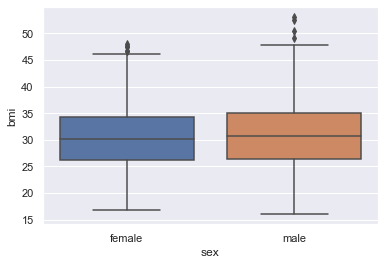

In [48]:
sns.boxplot(df['sex'],df['bmi'])

Hypothesis Method- b. Does bmi of males differ significantly from that of females?

Step1. Null Hypothesis - Both male/female bmi are same.
       Alternate Hypothesis - Both category bmi differ significantly
       
Step2. Alpha =  0.05 -> 5% of significance (two-tailed)
Step3.  two sample t-test
Step4.  difference between groupa(male) and groupb(female) mean is 1.6967 SD(less than 1.96 SD) and p-value of 0.089 is greater than alpha i.e 0.05,  thus we fail to reject null hypothesis

ANSWER- This statistical evidence confirm that bmi of males does not differ significantly from that of females

In [49]:
groupa = df[df['sex']=='male']['bmi']
groupa.to_numpy(copy= True)

array([33.77 , 33.   , 22.705, 28.88 , 29.83 , 26.22 , 34.4  , 42.13 ,
       24.6  , 23.845, 40.3  , 35.3  , 34.1  , 28.025, 17.385, 36.3  ,
       35.6  , 28.31 , 36.4  , 20.425, 20.8  , 36.67 , 39.9  , 21.78 ,
       37.05 , 37.3  , 35.2  , 28.   , 34.43 , 36.955, 31.68 , 27.36 ,
       33.66 , 24.7  , 26.315, 23.98 , 28.5  , 32.01 , 27.4  , 34.01 ,
       35.53 , 26.885, 37.62 , 22.895, 29.83 , 34.77 , 38.28 , 19.95 ,
       19.3  , 25.46 , 28.025, 30.875, 27.94 , 35.09 , 33.63 , 30.8  ,
       32.205, 28.595, 49.06 , 37.1  , 23.75 , 31.35 , 34.7  , 25.555,
       34.1  , 25.175, 22.42 , 32.49 , 25.3  , 29.735, 28.69 , 30.495,
       28.4  , 24.13 , 29.7  , 39.52 , 24.42 , 25.175, 35.53 , 39.6  ,
       29.64 , 28.215, 18.905, 41.47 , 30.3  , 15.96 , 27.835, 29.2  ,
       28.595, 19.95 , 30.69 , 41.895, 31.57 , 25.74 , 34.43 , 30.59 ,
       22.3  , 26.4  , 27.74 , 41.23 , 33.   , 30.875, 28.5  , 23.1  ,
       30.8  , 34.8  , 24.64 , 33.88 , 38.06 , 25.46 , 27.5  , 24.51 ,
      

In [50]:
groupb = df[df['sex']=='female']['bmi']
groupb.to_numpy(copy= True)

array([27.9  , 25.74 , 33.44 , 27.74 , 25.84 , 26.29 , 39.82 , 30.78 ,
       36.005, 32.4  , 31.92 , 27.72 , 23.085, 32.775, 26.315, 28.6  ,
       32.965, 26.6  , 36.63 , 30.8  , 38.665, 34.77 , 24.53 , 35.625,
       33.63 , 28.69 , 31.825, 22.88 , 37.335, 25.935, 22.42 , 28.9  ,
       39.1  , 36.19 , 24.75 , 28.1  , 29.59 , 39.805, 32.965, 38.285,
       41.23 , 34.8  , 31.16 , 27.2  , 27.74 , 26.98 , 39.49 , 24.795,
       31.3  , 37.62 , 30.8  , 31.6  , 30.115, 29.92 , 27.5  , 28.4  ,
       29.7  , 35.72 , 27.94 , 27.17 , 23.37 , 28.975, 33.915, 28.785,
       28.3  , 37.4  , 17.765, 26.505, 22.04 , 35.9  , 28.785, 28.05 ,
       31.9  , 36.   , 38.83 , 37.73 , 37.43 , 37.145, 23.37 , 25.46 ,
       27.83 , 26.6  , 36.85 , 29.8  , 37.   , 33.155, 31.825, 34.8  ,
       33.345, 37.7  , 28.9  , 33.155, 38.28 , 26.41 , 29.92 , 30.9  ,
       32.2  , 32.11 , 26.2  , 26.6  , 32.8  , 28.6  , 18.05 , 39.33 ,
       32.11 , 32.23 , 24.035, 36.08 , 28.88 , 31.8  , 26.73 , 30.9  ,
      

In [51]:
t_statistic , p_value = ttest_ind(groupa,groupb)
print(t_statistic , p_value)

1.696752635752224 0.08997637178984932


Hypothesis Method- c. Is the proportion of smokers significantly different in different genders?

Step1. Null Hypothesis - Proportion of smoker are same across different gender.
       Alternate Hypothesis - Proportion of smoker are significantly different across different gender
       
Step2. Alpha =  0.05 -> 5% of significance (two-tailed)
Step3.  Z Proportion Test
Step4.  p-value of 0.005 is significantly lesser than alpha i.e 0.05,  thus we reject null hypothesis

ANSWER- This statistical evidence confirm that proportion of smokers significantly different in different genders

In [52]:
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] 
num_females = df.sex.value_counts()[1]
num_males = df.sex.value_counts()[0] 

In [53]:
print([female_smokers, male_smokers] , [num_females, num_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')


[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [54]:

stat, pval = proportions_ztest([female_smokers, male_smokers] , [num_females, num_males])
print(stat, pval)

-2.7867402154855503 0.005324114164320532


d. Is the distribution of bmi across women with no children, one child and two children, the same ?

Hypothesis Method- d. Is the distribution of bmi across women with no children, one child and two children, the same ?

Step1. Null Hypothesis - distribution of bmi across women with no children, one child and two children are same
       Alternate Hypothesis - distribution of bmi across women with no children, one child and two children are            different
       
Step2. Alpha =  0.05 -> 5% of significance (two-tailed)
Step3.  One way Anova
Step4.  p-value of 0.79376 is significantly greater than alpha i.e 0.05,  thus we fail to reject null hypothesis

ANSWER - distribution of bmi across women with no children, one child and two children are same

In [55]:
df_n = df[(df['sex']=='female') & (df['children'] < 3)].iloc[:,[2,3]].copy()
df_n.head(50)

,bmi,children
0,27.900,0
5,25.740,0
6,33.440,1
9,25.840,0
11,26.290,0
13,39.820,0
16,30.780,1
20,36.005,0
21,32.400,1
23,31.920,1


In [56]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = df_n).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN
